In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# CIFAR-10 class names
CIFAR10_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']

### LOADING AND PREPARING CIFAR-10


In [3]:
def load_and_prepare_cifar10(batch_size=32, val_size=5000):
    """
    Load and prepare CIFAR-10 dataset
    Args:
        batch_size (int): Size of the batches for training and validation.
        val_size (int): Size of the validation set to split from training data.
    Returns:
        train_ds (tf.data.Dataset): Training dataset.
        val_ds (tf.data.Dataset): Validation dataset.
        test_ds (tf.data.Dataset): Test dataset.
        num_classes (int): Number of classes in the dataset.
    
    """
    print("Loading CIFAR-10...")
    
    # Load data
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    
    # Split validation set from training data
    x_val = x_train[-val_size:]
    y_val = y_train[-val_size:]
    x_train = x_train[:-val_size]
    y_train = y_train[:-val_size]
    
    # Normalize to [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_val = x_val.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Flatten labels
    y_train = y_train.flatten()
    y_val = y_val.flatten()
    y_test = y_test.flatten()
    
    # Create datasets
    train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    
    # Batch and prefetch
    train_ds = train_ds.shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    
    return train_ds, val_ds, test_ds, 10

In [4]:
# Load the dataset
train_ds, val_ds, test_ds, num_classes = load_and_prepare_cifar10(batch_size=32)

Loading CIFAR-10...


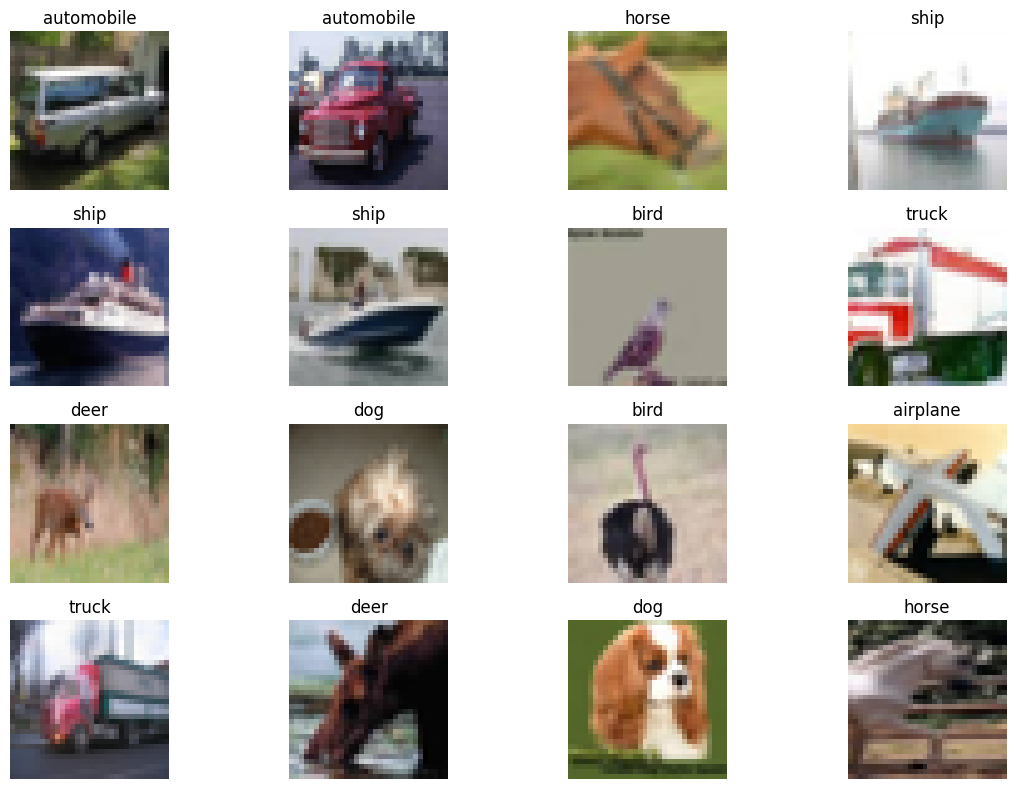

In [5]:
# Visualize sample images
plt.figure(figsize=(12, 8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    
    # Get first batch
    for images, labels in train_ds.take(1):
        img = images[i].numpy()
        label = labels[i].numpy()
        plt.imshow(img)
        plt.title(f'{CIFAR10_CLASSES[label]}')
        plt.axis('off')
        
plt.tight_layout()
plt.show()

# BUILDING THE BASE CNN MODEL

In [6]:
# Create the Base CNN model

def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    """Create CNN model"""
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        
        # Block 1
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),  # Reduces spatial dimensions
        tf.keras.layers.Dropout(0.25),
        
        # Block 2
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        
        # Block 3
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        
        # Classifier
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [7]:
# Train the base CNN model
print("Training Base CNN...")

EPOCHS = 10 # Set global variable for epochs 

model_cnn = create_cnn_model((32, 32, 3), 10)

history_cnn = model_cnn.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    verbose=1
)

Training Base CNN...
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.4063 - loss: 1.5995 - val_accuracy: 0.6182 - val_loss: 1.0631
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 75s 54ms/step - accuracy: 0.6198 - loss: 1.0611 - val_accuracy: 0.6368 - val_loss: 1.0304
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.6821 - loss: 0.9055 - val_accuracy: 0.7086 - val_loss: 0.8354
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 48ms/step - accuracy: 0.7145 - loss: 0.8138 - val_accuracy: 0.7542 - val_loss: 0.6950
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step - accuracy: 0.7370 - loss: 0.7488 - val_accuracy: 0.7548 - val_loss: 0.7060
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step - accuracy: 0.7564 - loss: 0.7036 - val_accuracy: 0.7366 - val_loss: 0.7435
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.7633 - loss: 0.6783 - val_accuracy: 0.7880 - val_loss: 0.6190
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step

In [8]:
# Visualization of Training Results

def visualize_training_results(history, title="Model Training"):
    """
    Plot training history for accuracy and loss.
    Args:
        history (tf.keras.callbacks.History): Training history object
        title (str): Title for the plots.
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy of training and validation
    ax1.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s') 
    ax1.set_title(f'{title} - Accuracy') # 'accuracy' for TF 2.x
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot loss of training and validation 
    ax2.plot(history.history['loss'], label='Training Loss', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    ax2.set_title(f'{title} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### DATA AUGMENTATION

In [9]:
# Create the augmentation layer

def create_augmentation_layer():
    """
    Create data augmentation layer
    Returns:
        tf.keras.Sequential: Sequential model with augmentation layers.
    """
    return tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomContrast(0.1)
    ])

In [10]:
# Create a new model with the augmentation layer added at the model's input

def create_cnn_with_augmentation(input_shape=(32, 32, 3), num_classes=10):
    """
    Create CNN with data augmentation
    Args:
        input_shape (tuple): Shape of the input images.
        num_classes (int): Number of classes in the dataset.
        Returns:
            tf.keras.Sequential: Sequential model with augmentation layers.
    """
    augmentation = create_augmentation_layer()
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        augmentation,  # Add augmentation at the beginning
        
        # Same CNN architecture as before
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [11]:
# Create and retrain the base CNN model with data augmentation
print("Training CNN with Data Augmentation...")
model_aug = create_cnn_with_augmentation()

history_aug = model_aug.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    verbose=1
)

Training CNN with Data Augmentation...
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.3567 - loss: 1.7331 - val_accuracy: 0.4998 - val_loss: 1.4729
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 54ms/step - accuracy: 0.5296 - loss: 1.3124 - val_accuracy: 0.5528 - val_loss: 1.2587
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.5820 - loss: 1.1803 - val_accuracy: 0.5578 - val_loss: 1.3463
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.6133 - loss: 1.0937 - val_accuracy: 0.5844 - val_loss: 1.3265
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 53ms/step - accuracy: 0.6332 - loss: 1.0445 - val_accuracy: 0.6610 - val_loss: 0.9594
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 52ms/step - accuracy: 0.6504 - loss: 0.9916 - val_accuracy: 0.6694 - val_loss: 1.0329
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 53ms/step - accuracy: 0.6641 - loss: 0.9574 - val_accuracy: 0.6748 - val_loss: 0.9607
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━

### Compare No Augmentation vs. Augmentation

Training without augmentation
Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 94s 65ms/step - accuracy: 0.4086 - loss: 1.5850 - val_accuracy: 0.5716 - val_loss: 1.2444
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 93s 66ms/step - accuracy: 0.6229 - loss: 1.0559 - val_accuracy: 0.6552 - val_loss: 0.9828
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 55ms/step - accuracy: 0.6758 - loss: 0.9174 - val_accuracy: 0.7158 - val_loss: 0.8112


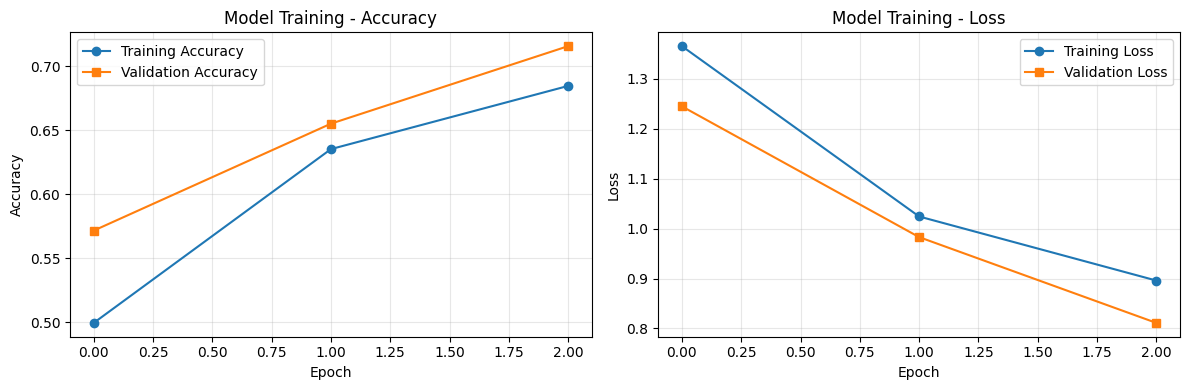

Training with augmentation
Epoch 1/3


c:\Users\HP\miniconda3\envs\dsp_jblink\lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 59ms/step - accuracy: 0.3626 - loss: 1.7227 - val_accuracy: 0.5136 - val_loss: 1.3627
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.5300 - loss: 1.3082 - val_accuracy: 0.5474 - val_loss: 1.2541
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 55ms/step - accuracy: 0.5844 - loss: 1.1721 - val_accuracy: 0.6280 - val_loss: 1.0457


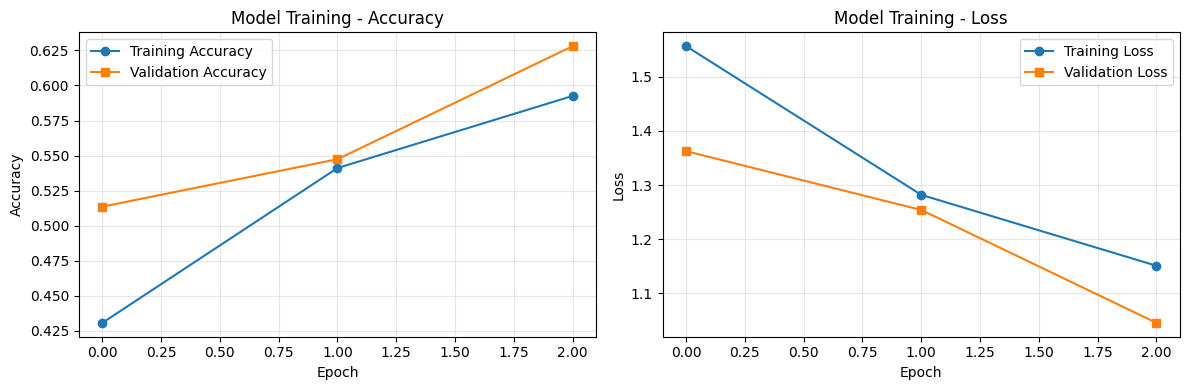

In [12]:
# No Augmentation vs Augmentation
print("Training without augmentation")
model = create_cnn_model((32, 32, 3), 10)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
history_no_aug = model.fit(train_ds, validation_data=val_ds, epochs=3)
visualize_training_results(history_no_aug)

print("Training with augmentation")
aug_layer = create_augmentation_layer()
augmented_train_ds = train_ds.map(lambda x, y: (aug_layer(x), y))
model = create_cnn_model((32, 32, 3), 10)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_aug = model.fit(augmented_train_ds, validation_data=val_ds, epochs=3)
visualize_training_results(history_aug)


### TRANSFER LEARNING

In [13]:
# Create the transfer learning model using ResNet50

def create_transfer_learning_model(input_shape=(32, 32, 3), num_classes=10):
    """
    Create transfer learning model using pretrained ResNet50
    Args:
        input_shape (tuple): Shape of the input images.
        num_classes (int): Number of classes in the dataset.
    Returns:
        tf.keras.Sequential: Sequential model with transfer learning.
    
    """
    # Load pretrained model
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    # Freeze base model
    base_model.trainable = False
    
    # Add custom head
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [14]:
# Create and train transfer learning model

print("Training Transfer Learning Model (ResNet50)...")
model_transfer = create_transfer_learning_model()

history_transfer = model_transfer.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    verbose=1
)

Training Transfer Learning Model (ResNet50)...
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 157s 107ms/step - accuracy: 0.1018 - loss: 2.3528 - val_accuracy: 0.0970 - val_loss: 2.3029
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 101ms/step - accuracy: 0.0997 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3029
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 148s 105ms/step - accuracy: 0.0946 - loss: 2.3027 - val_accuracy: 0.0958 - val_loss: 2.3029
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 148s 105ms/step - accuracy: 0.0996 - loss: 2.3030 - val_accuracy: 0.1002 - val_loss: 2.3014
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.1013 - loss: 2.2996 - val_accuracy: 0.1224 - val_loss: 2.2815
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.1240 - loss: 2.2773 - val_accuracy: 0.1732 - val_loss: 2.2255
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 186s 132ms/step - accuracy: 0.1321 - loss: 2.2568 - val_accuracy: 0.1670 - val_loss: 2.2228
Epoch 8/10
1407

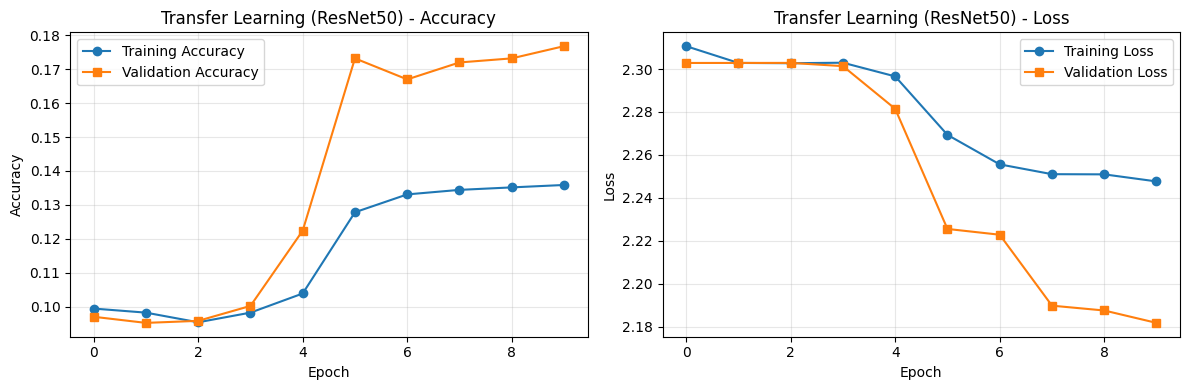

In [15]:
# Visualize training results
visualize_training_results(history_transfer, "Transfer Learning (ResNet50)")

### ADVANCED ANALYSIS

In [16]:
# Function to evaluate the models and show confusion matrix

def evaluate_model(model, test_ds, model_name="Model"):
    """
    Comprehensive model evaluation including:
    - Test accuracy
    - Confusion matrix
    - Classification report with precision, recall, F1-score
    """
    print(f"\n{'='*20} {model_name} Evaluation {'='*20}")
    
    # Get predictions
    y_pred = []
    y_true = []
    
    for x_batch, y_batch in test_ds:
        predictions = model.predict(x_batch, verbose=0)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(y_batch.numpy())
    
    # Test accuracy
    test_loss, test_acc = model.evaluate(test_ds, verbose=0)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=CIFAR10_CLASSES, yticklabels=CIFAR10_CLASSES)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=CIFAR10_CLASSES))
    
    return test_acc, y_true, y_pred


==================== Basic CNN Evaluation ====================
Test Accuracy: 0.7860
Test Loss: 0.6395


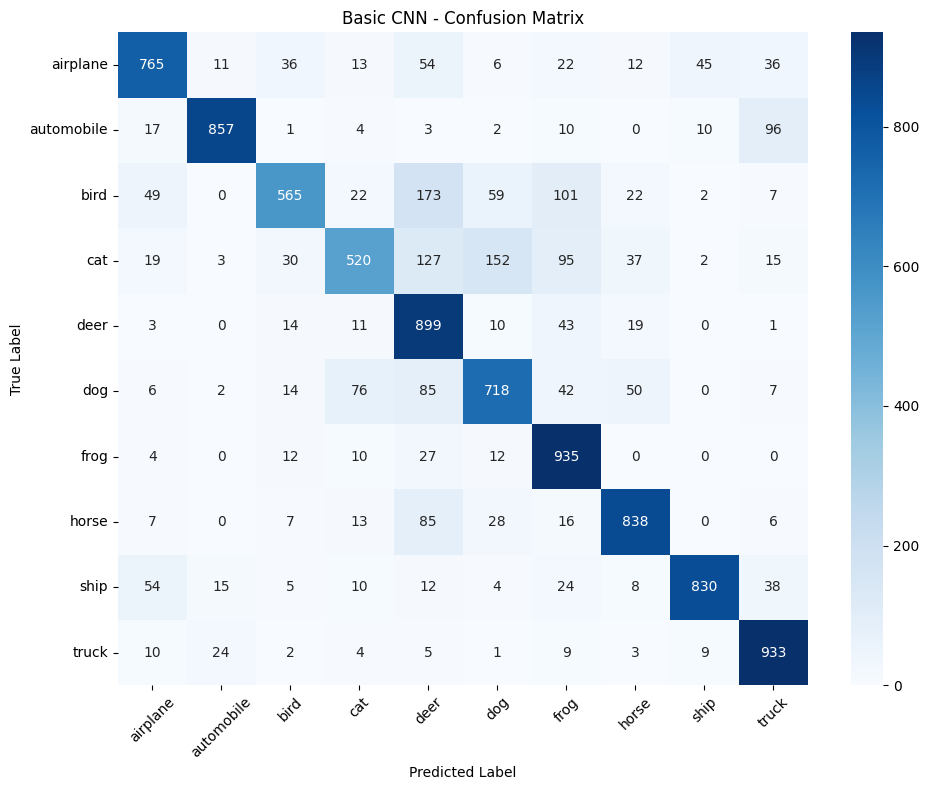


Classification Report:
              precision    recall  f1-score   support

    airplane       0.82      0.77      0.79      1000
  automobile       0.94      0.86      0.90      1000
        bird       0.82      0.56      0.67      1000
         cat       0.76      0.52      0.62      1000
        deer       0.61      0.90      0.73      1000
         dog       0.72      0.72      0.72      1000
        frog       0.72      0.94      0.81      1000
       horse       0.85      0.84      0.84      1000
        ship       0.92      0.83      0.87      1000
       truck       0.82      0.93      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.78     10000
weighted avg       0.80      0.79      0.78     10000


==================== CNN with Augmentation Evaluation ====================
Test Accuracy: 0.7124
Test Loss: 0.8680


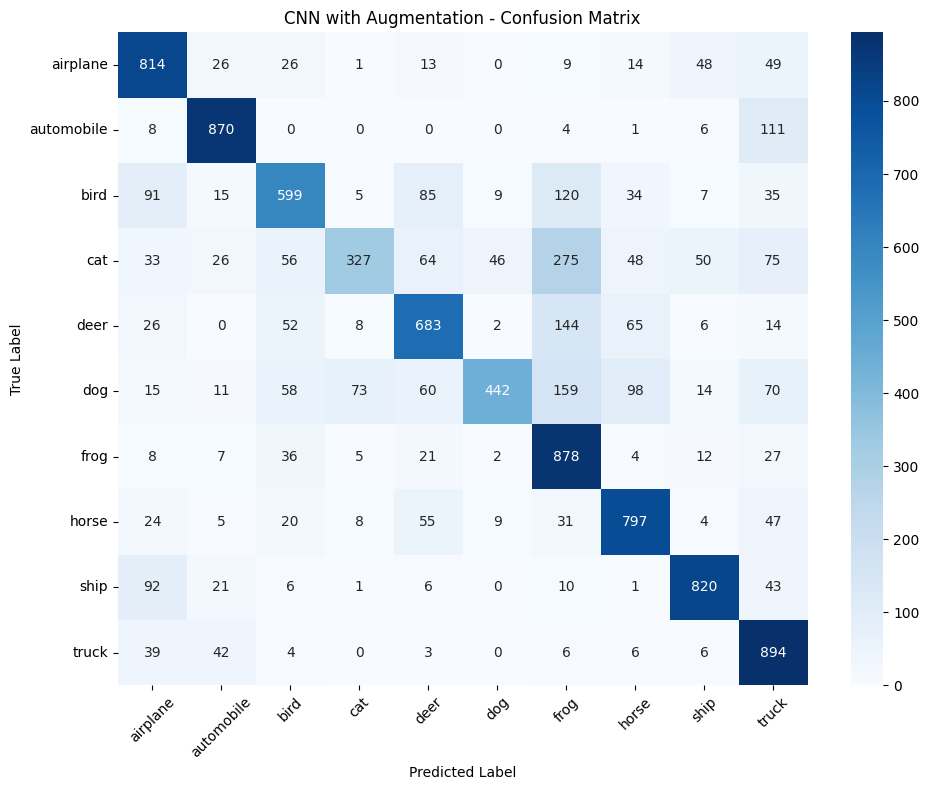


Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.81      0.76      1000
  automobile       0.85      0.87      0.86      1000
        bird       0.70      0.60      0.65      1000
         cat       0.76      0.33      0.46      1000
        deer       0.69      0.68      0.69      1000
         dog       0.87      0.44      0.59      1000
        frog       0.54      0.88      0.67      1000
       horse       0.75      0.80      0.77      1000
        ship       0.84      0.82      0.83      1000
       truck       0.65      0.89      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.74      0.71      0.70     10000
weighted avg       0.74      0.71      0.70     10000


==================== Transfer Learning Evaluation ====================
Test Accuracy: 0.1732
Test Loss: 2.1828


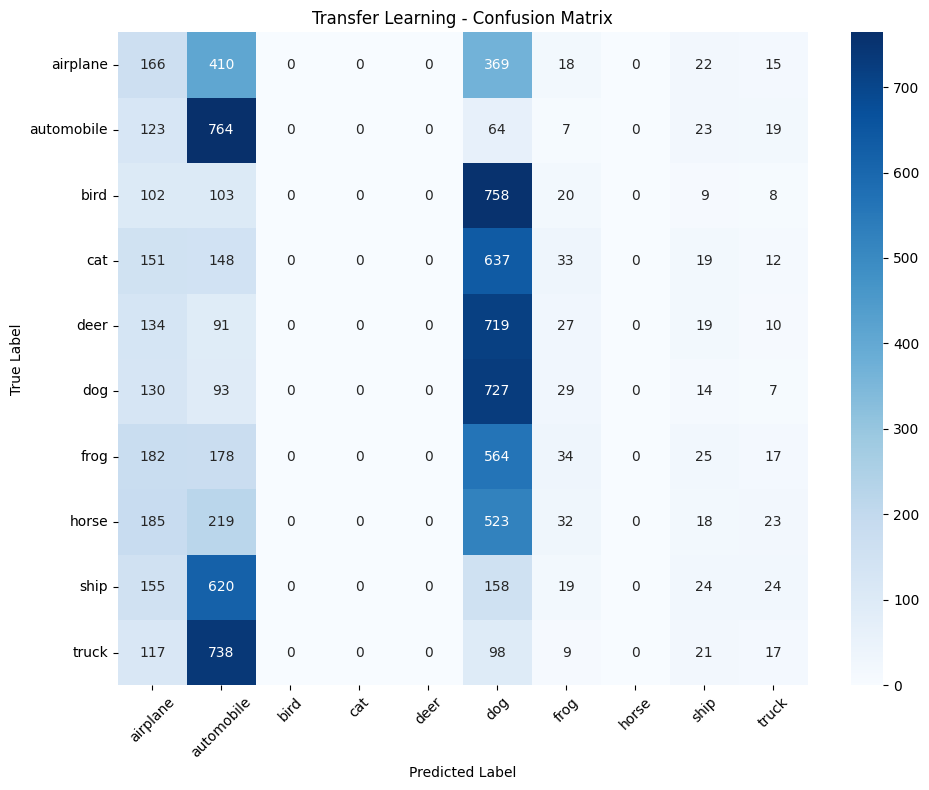


Classification Report:
              precision    recall  f1-score   support

    airplane       0.11      0.17      0.14      1000
  automobile       0.23      0.76      0.35      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.16      0.73      0.26      1000
        frog       0.15      0.03      0.06      1000
       horse       0.00      0.00      0.00      1000
        ship       0.12      0.02      0.04      1000
       truck       0.11      0.02      0.03      1000

    accuracy                           0.17     10000
   macro avg       0.09      0.17      0.09     10000
weighted avg       0.09      0.17      0.09     10000



c:\Users\HP\miniconda3\envs\dsp_jblink\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\miniconda3\envs\dsp_jblink\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\miniconda3\envs\dsp_jblink\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [17]:
# Evaluate all the three models
results = {}

# Basic CNN
acc_cnn, y_true_cnn, y_pred_cnn = evaluate_model(model_cnn, test_ds, "Basic CNN")
results['Base CNN'] = acc_cnn

# CNN with Augmentation
acc_aug, y_true_aug, y_pred_aug = evaluate_model(model_aug, test_ds, "CNN with Augmentation")
results['CNN + Augmentation'] = acc_aug

# Transfer Learning
acc_transfer, y_true_transfer, y_pred_transfer = evaluate_model(model_transfer, test_ds, "Transfer Learning")
results['Transfer Learning'] = acc_transfer


FINAL RESULTS COMPARISON


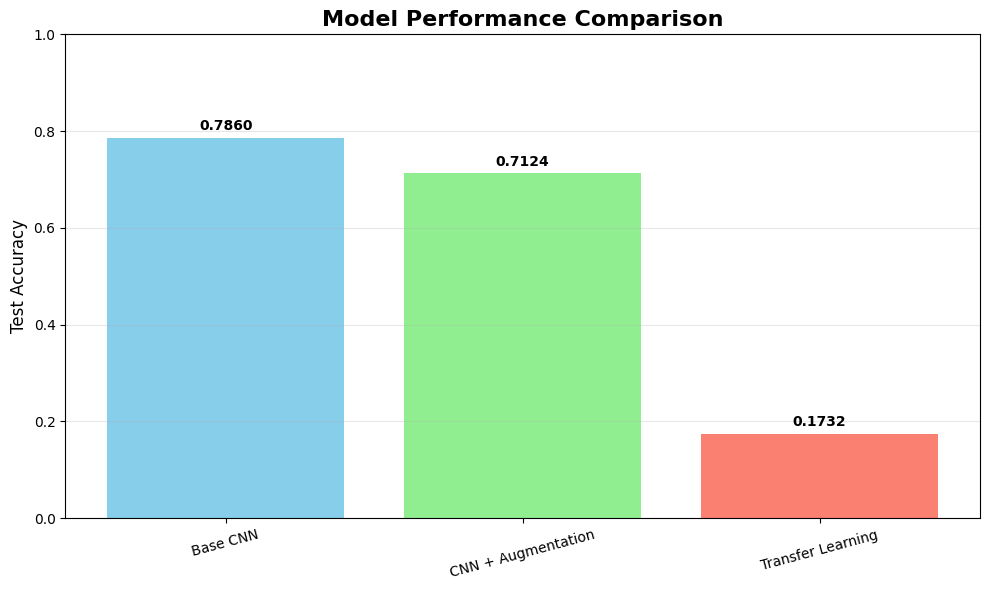

In [18]:
# Compare all models

print("FINAL RESULTS COMPARISON")

# Create comparison plot
models = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Test Accuracy', fontsize=12)
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# Print results table

print(f"{'Model':<20} {'Test Accuracy':<15}")
print("-" * 35)
for model_name, accuracy in results.items():
    print(f"{model_name:<20} {accuracy:<15.4f}")

best_model = max(results, key=results.get)
print(f"\nBest performing model: {best_model} ({results[best_model]:.4f})")


Model                Test Accuracy  
-----------------------------------
Base CNN             0.7860         
CNN + Augmentation   0.7124         
Transfer Learning    0.1732         

Best performing model: Base CNN (0.7860)


In [20]:
 # Create misclassified images plot

def show_misclassified_images(model, test_ds, model_name, num_examples=8):
    """Show examples of misclassified images"""
    print(f"\nMisclassified Examples for {model_name}:")
    
    misclassified_images = []
    misclassified_true = []
    misclassified_pred = []
    
    for x_batch, y_batch in test_ds:
        predictions = model.predict(x_batch, verbose=0)
        pred_classes = np.argmax(predictions, axis=1)
        
        for i in range(len(x_batch)):
            if pred_classes[i] != y_batch[i] and len(misclassified_images) < num_examples:
                misclassified_images.append(x_batch[i])
                misclassified_true.append(y_batch[i])
                misclassified_pred.append(pred_classes[i])
    
    # Plot misclassified examples
    plt.figure(figsize=(12, 6))
    for i in range(min(num_examples, len(misclassified_images))):
        plt.subplot(2, 4, i+1)
        plt.imshow(misclassified_images[i])
        true_label = CIFAR10_CLASSES[misclassified_true[i]]
        pred_label = CIFAR10_CLASSES[misclassified_pred[i]]
        plt.title(f'True: {true_label}\nPred: {pred_label}', fontsize=10)
        plt.axis('off')
    
    plt.suptitle(f'{model_name} - Misclassified Examples', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


Misclassified Examples for Base CNN:


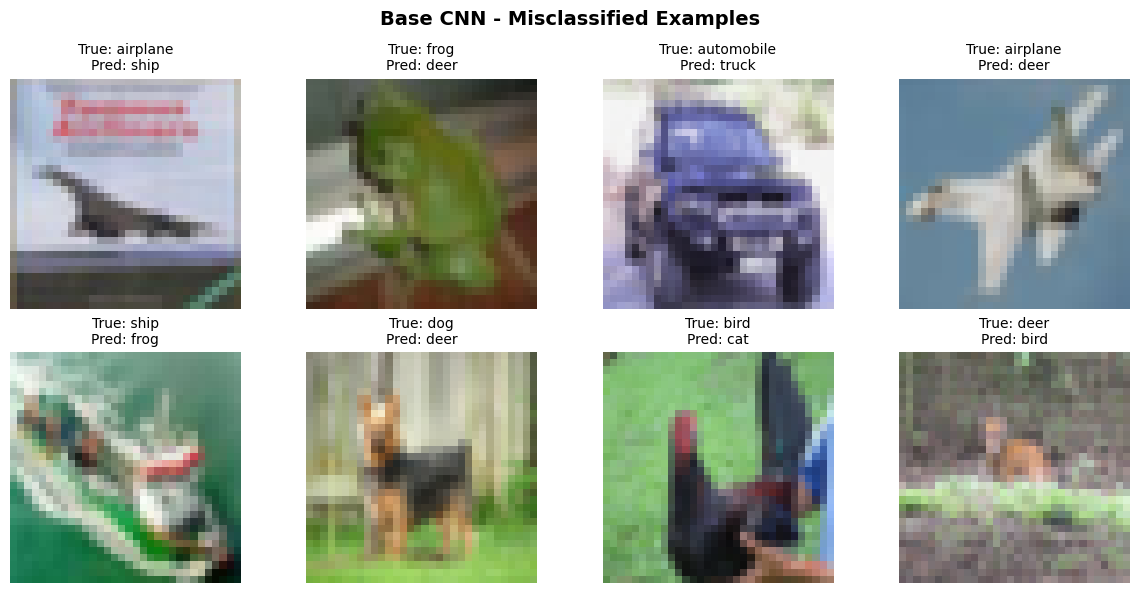

In [21]:
# Show misclassified examples for the best model
best_model_obj = model_transfer if results['Transfer Learning'] == max(results.values()) else \
                 (model_aug if results['CNN + Augmentation'] == max(results.values()) else model_cnn)
show_misclassified_images(best_model_obj, test_ds, best_model)


In [22]:
# ### CLASS-WISE EVALUATION METRICS: Calculate precision, recall, and F1-score for each class

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model_cnn.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_true, y_pred, target_names=CIFAR10_CLASSES))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

    airplane       0.82      0.77      0.79      1000
  automobile       0.94      0.86      0.90      1000
        bird       0.82      0.56      0.67      1000
         cat       0.76      0.52      0.62      1000
        deer       0.61      0.90      0.73      1000
         dog       0.72      0.72      0.72      1000
        frog       0.72      0.94      0.81      1000
       horse       0.85      0.84      0.84      1000
        ship       0.92      0.83      0.87      1000
       truck       0.82      0.93      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.78     10000
weighted avg       0.80      0.79      0.78     10000



### EXPLORATION PART A

##### Learning Rate Scheduling
Try using a learning rate scheduler that reduces the learning rate when validation accuracy stops improving.

In [23]:
# Add a learning rate scheduler callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', 
    factor=0.5, 
    patience=3,
    verbose=1
)

In [24]:
model = create_cnn_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs= EPOCHS, callbacks=[reduce_lr])

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 50ms/step - accuracy: 0.4196 - loss: 1.5664 - val_accuracy: 0.5962 - val_loss: 1.1249 - learning_rate: 0.0010
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.6167 - loss: 1.0681 - val_accuracy: 0.6308 - val_loss: 1.0406 - learning_rate: 0.0010
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 47ms/step - accuracy: 0.6762 - loss: 0.9207 - val_accuracy: 0.6820 - val_loss: 0.8942 - learning_rate: 0.0010
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.7100 - loss: 0.8289 - val_accuracy: 0.6960 - val_loss: 0.9377 - learning_rate: 0.0010
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 48ms/step - accuracy: 0.7294 - loss: 0.7757 - val_accuracy: 0.7280 - val_loss: 0.7695 - learning_rate: 0.0010
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step - accuracy: 0.7495 - loss: 0.7232 - val_accuracy: 0.7826 - val_loss: 0.6350 - learning_rate: 0.0010
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 45ms/step - accura

### DEEPER CNN MODEL


In [25]:
# Create deeper CNN model with more layers to cature complex features

def create_deeper_cnn_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),

        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [26]:
# Create and train the deeper CNN model
import time

print("Training Deeper CNN...")
start_time = time.time()

deeper_model = create_deeper_cnn_model((32, 32, 3), num_classes)
deeper_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_deeper = deeper_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    verbose=1
)

deeper_training_time = time.time() - start_time 
print(f"Deeper CNN training time: {deeper_training_time:.2f} seconds")

Training Deeper CNN...
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 97s 67ms/step - accuracy: 0.4187 - loss: 1.7120 - val_accuracy: 0.5910 - val_loss: 1.1618
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 90s 64ms/step - accuracy: 0.6409 - loss: 1.0139 - val_accuracy: 0.6800 - val_loss: 0.9423
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 88s 62ms/step - accuracy: 0.7004 - loss: 0.8474 - val_accuracy: 0.7010 - val_loss: 0.8886
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 88s 62ms/step - accuracy: 0.7366 - loss: 0.7500 - val_accuracy: 0.7272 - val_loss: 0.8019
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 92s 66ms/step - accuracy: 0.7579 - loss: 0.6841 - val_accuracy: 0.7324 - val_loss: 0.8265
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 89s 64ms/step - accuracy: 0.7780 - loss: 0.6306 - val_accuracy: 0.7696 - val_loss: 0.6941
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 89s 63ms/step - accuracy: 0.8008 - loss: 0.5726 - val_accuracy: 0.7460 - val_loss: 0.7402
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 88s 62ms/st

### WIDER CNN MODEL

In [27]:
# Create model with fewer layers and more filters per layer

def create_wider_cnn_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [28]:
# Create and train the wider CNN model

print("Training Wider CNN...")
start_time = time.time()

wider_model = create_wider_cnn_model((32, 32, 3), num_classes)
wider_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_wider = wider_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    verbose=1
)

wider_training_time = time.time() - start_time  
print(f"Wider CNN training time: {wider_training_time:.2f} seconds")

Training Wider CNN...
Epoch 1/10


c:\Users\HP\miniconda3\envs\dsp_jblink\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 111s 78ms/step - accuracy: 0.4021 - loss: 1.7553 - val_accuracy: 0.4096 - val_loss: 1.6938
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 125s 88ms/step - accuracy: 0.5985 - loss: 1.1317 - val_accuracy: 0.5508 - val_loss: 1.2778
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 124s 88ms/step - accuracy: 0.6540 - loss: 0.9806 - val_accuracy: 0.5886 - val_loss: 1.2146
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 126s 90ms/step - accuracy: 0.6932 - loss: 0.8797 - val_accuracy: 0.6126 - val_loss: 1.1138
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 126s 89ms/step - accuracy: 0.7182 - loss: 0.8043 - val_accuracy: 0.6150 - val_loss: 1.3316
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 123s 87ms/step - accuracy: 0.7384 - loss: 0.7445 - val_accuracy: 0.5974 - val_loss: 1.2022
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 122s 87ms/step - accuracy: 0.7573 - loss: 0.6983 - val_accuracy: 0.6726 - val_loss: 0.9755
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 117s 83ms/step - accuracy: 0.7762 - lo

### Network Depth vs. Width


==================== Deeper CNN Evaluation ====================
Test Accuracy: 0.7840
Test Loss: 0.6635


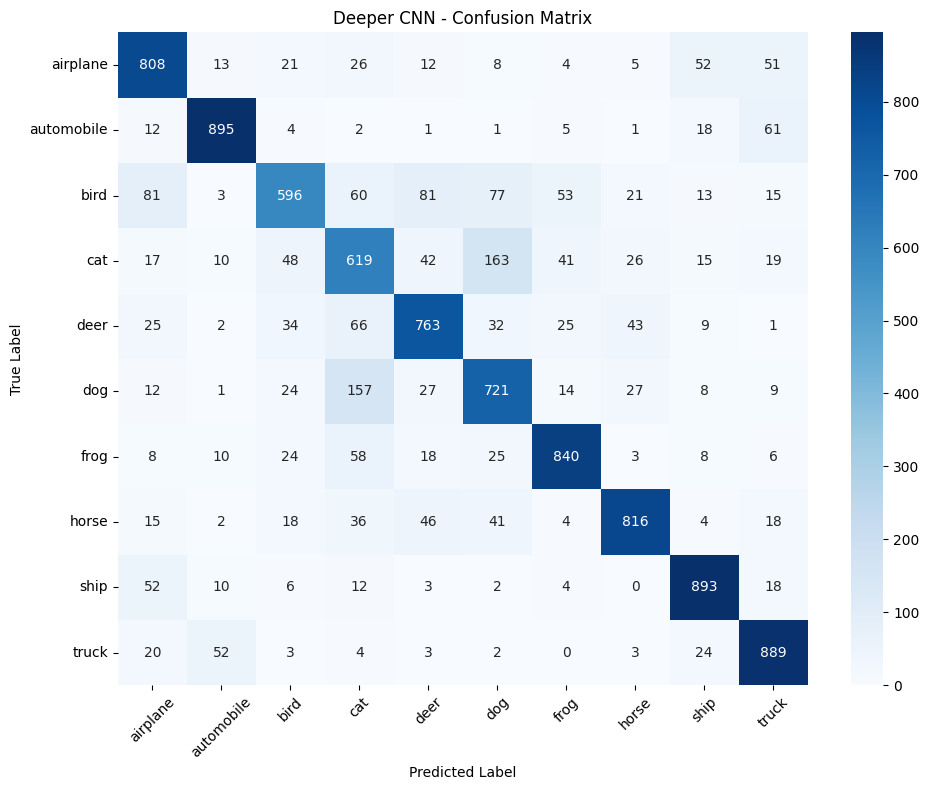


Classification Report:
              precision    recall  f1-score   support

    airplane       0.77      0.81      0.79      1000
  automobile       0.90      0.90      0.90      1000
        bird       0.77      0.60      0.67      1000
         cat       0.60      0.62      0.61      1000
        deer       0.77      0.76      0.76      1000
         dog       0.67      0.72      0.70      1000
        frog       0.85      0.84      0.84      1000
       horse       0.86      0.82      0.84      1000
        ship       0.86      0.89      0.87      1000
       truck       0.82      0.89      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000


==================== Wider CNN Evaluation ====================
Test Accuracy: 0.7204
Test Loss: 0.8511


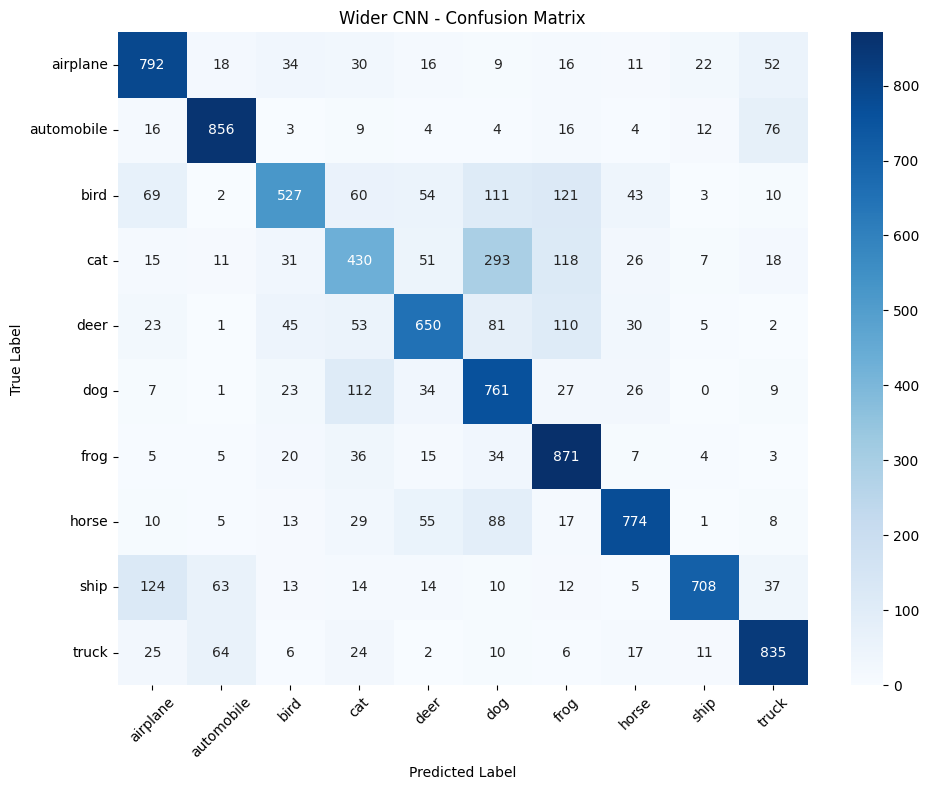


Classification Report:
              precision    recall  f1-score   support

    airplane       0.73      0.79      0.76      1000
  automobile       0.83      0.86      0.85      1000
        bird       0.74      0.53      0.61      1000
         cat       0.54      0.43      0.48      1000
        deer       0.73      0.65      0.69      1000
         dog       0.54      0.76      0.63      1000
        frog       0.66      0.87      0.75      1000
       horse       0.82      0.77      0.80      1000
        ship       0.92      0.71      0.80      1000
       truck       0.80      0.83      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000


FINAL COMPARISON SUMMARY
Deeper CNN  - Test Accuracy: 0.7840 | Parameters: 592,042
Wider CNN   - Test Accuracy: 0.7204 | Parameters: 1,126,410
Deeper CNN (better by 6.36%)


In [29]:
# Compare Performace by extracting the accuracy from evaluate_model return value

deeper_results = evaluate_model(deeper_model, test_ds, "Deeper CNN")
deeper_acc = deeper_results if isinstance(deeper_results, float) else deeper_results[0]

wider_results = evaluate_model(wider_model, test_ds, "Wider CNN")
wider_acc = wider_results if isinstance(wider_results, float) else wider_results[0]

print("\n" + "="*50)
print("FINAL COMPARISON SUMMARY")
print("="*50)
print(f"Deeper CNN  - Test Accuracy: {deeper_acc:.4f} | Parameters: {deeper_model.count_params():,}")
print(f"Wider CNN   - Test Accuracy: {wider_acc:.4f} | Parameters: {wider_model.count_params():,}")

if deeper_acc > wider_acc:
    print(f"Deeper CNN (better by {(deeper_acc-wider_acc)*100:.2f}%)")
else:
    print(f"Wider CNN (better by {(wider_acc-deeper_acc)*100:.2f}%)")

In [30]:
# Compare the training speed of deeper and wider models

print("\n" + "="*50)
print("TRAINING SPEED COMPARISON")
print("="*50)

print(f"Deeper CNN - Training time: {deeper_training_time:.2f} seconds")
print(f"Wider CNN  - Training time: {wider_training_time:.2f} seconds")

if deeper_training_time < wider_training_time:
    time_saved = wider_training_time - deeper_training_time
    print(f"Deeper CNN (faster by {time_saved:.2f} seconds)")
else:
    time_saved = deeper_training_time - wider_training_time
    print(f"Wider CNN (faster by {time_saved:.2f} seconds)")

# Additional speed metrics
print(f"\nTime per epoch:")
print(f"Deeper CNN: {deeper_training_time/EPOCHS:.2f} seconds/epoch")
print(f"Wider CNN:  {wider_training_time/EPOCHS:.2f} seconds/epoch")


TRAINING SPEED COMPARISON
Deeper CNN - Training time: 891.35 seconds
Wider CNN  - Training time: 1215.85 seconds
Deeper CNN (faster by 324.50 seconds)

Time per epoch:
Deeper CNN: 89.14 seconds/epoch
Wider CNN:  121.58 seconds/epoch


### Batch Size Experiments 

Training with batch size = 32
Loading CIFAR-10...
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 51ms/step - accuracy: 0.4233 - loss: 1.5685 - val_accuracy: 0.4922 - val_loss: 1.5251
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - accuracy: 0.6176 - loss: 1.0648 - val_accuracy: 0.6654 - val_loss: 0.9496
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 54ms/step - accuracy: 0.6772 - loss: 0.9227 - val_accuracy: 0.6720 - val_loss: 0.9567
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 75s 53ms/step - accuracy: 0.7129 - loss: 0.8204 - val_accuracy: 0.7486 - val_loss: 0.7320
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.7373 - loss: 0.7545 - val_accuracy: 0.7614 - val_loss: 0.6906
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 50ms/step - accuracy: 0.7517 - loss: 0.7125 - val_accuracy: 0.7916 - val_loss: 0.6107
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 54ms/step - accuracy: 0.7693 - loss: 0.6708 - val_accuracy: 0.7806 - val_loss: 0.6504
Epoch 8/10
1407/1407 ━━━━━

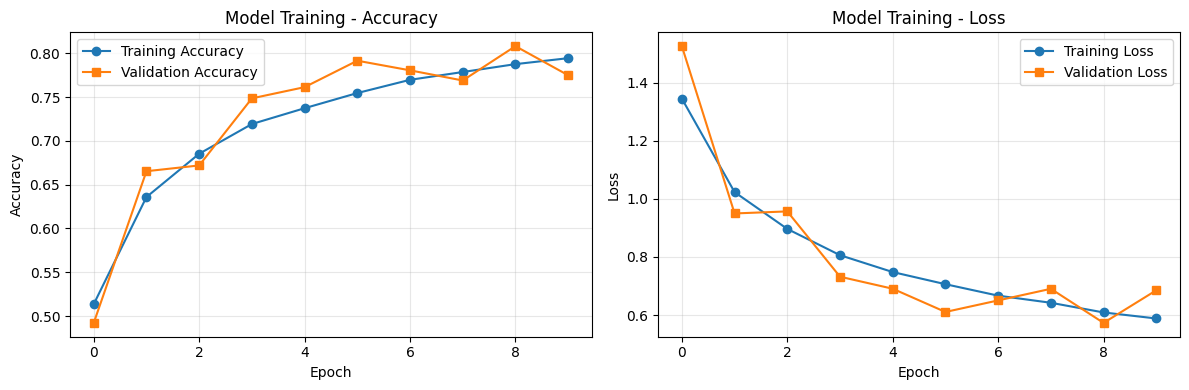


Training curves for batch size 64:


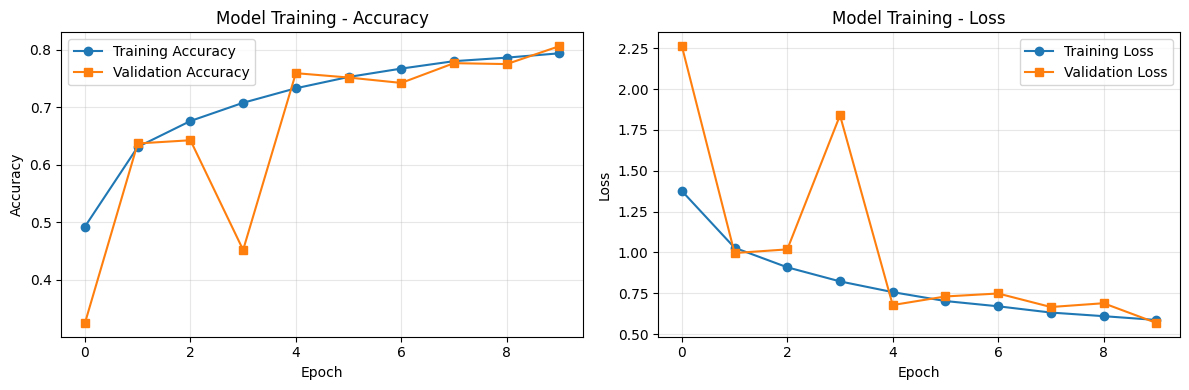


Training curves for batch size 256:


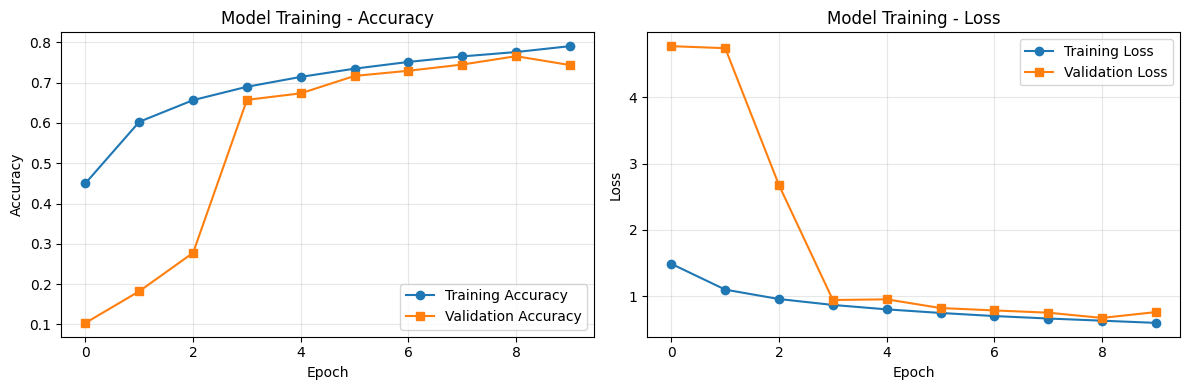

In [31]:
# Vary batch size and observe the impact on training time and accuracy
batch_results = {} 

batch_sizes = [32, 64, 256]
for bs in batch_sizes:
    print(f"Training with batch size = {bs}")
    # Fix: Unpack all 4 returned values
    train_ds, val_ds, test_ds, num_classes = load_and_prepare_cifar10(batch_size=bs)
    
    model = create_cnn_model((32, 32, 3), 10)
    model.compile(optimizer='adam', 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
                  metrics=['accuracy'])
    
     # Time the training
    start_time = time.time()
    history = model.fit(
        train_ds, 
        validation_data=val_ds, 
        epochs=EPOCHS,
        verbose=1
    )
    training_time = time.time() - start_time
    
    
     # Evaluate final performance
    test_loss, test_acc = model.evaluate(test_ds, verbose=0)
    
    # Store results
    batch_results[bs] = {
        'history': history,
        'training_time': training_time,
        'test_accuracy': test_acc,
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1]
    }
    
    print(f"Batch size {bs} - Training time: {training_time:.2f}s, Test accuracy: {test_acc:.4f}")
    
    
# Visualize individual training curves
for bs in batch_sizes:
    print(f"\nTraining curves for batch size {bs}:")
    visualize_training_results(batch_results[bs]['history'])

In [32]:
# Batch size comparison summary

print("\n" + "="*70)
print("BATCH SIZE COMPARISON SUMMARY")
print("="*70)

print(f"{'Batch Size':<12} {'Training Time':<15} {'Test Accuracy':<15} {'Convergence':<15}")
print("-" * 70)

for bs in batch_sizes:
    results = batch_results[bs]
    convergence = "Fast" if results['final_val_acc'] > 0.7 else "Slow"
    print(f"{bs:<12} {results['training_time']:.2f}s{'':<9} {results['test_accuracy']:.4f}{'':<9} {convergence:<15}")

# Find best performing batch size
best_batch_size = max(batch_results.keys(), key=lambda x: batch_results[x]['test_accuracy'])
fastest_batch_size = min(batch_results.keys(), key=lambda x: batch_results[x]['training_time'])

print(f"\nBest Accuracy: Batch size {best_batch_size} ({batch_results[best_batch_size]['test_accuracy']:.4f})")
print(f"Fastest Training: Batch size {fastest_batch_size} ({batch_results[fastest_batch_size]['training_time']:.2f}s)")


BATCH SIZE COMPARISON SUMMARY
Batch Size   Training Time   Test Accuracy   Convergence    
----------------------------------------------------------------------
32           736.56s          0.7646          Fast           
64           732.84s          0.7953          Fast           
256          758.15s          0.7393          Fast           

Best Accuracy: Batch size 64 (0.7953)
Fastest Training: Batch size 64 (732.84s)


### Optimizer Comparison

Training with optimizer = SGD
Epoch 1/10


c:\Users\HP\miniconda3\envs\dsp_jblink\lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


176/176 ━━━━━━━━━━━━━━━━━━━━ 75s 419ms/step - accuracy: 0.1831 - loss: 2.1841 - val_accuracy: 0.0990 - val_loss: 2.4730
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 70s 396ms/step - accuracy: 0.2670 - loss: 1.9179 - val_accuracy: 0.0998 - val_loss: 2.8229
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 69s 391ms/step - accuracy: 0.3198 - loss: 1.7920 - val_accuracy: 0.1818 - val_loss: 2.3296
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 69s 391ms/step - accuracy: 0.3517 - loss: 1.6982 - val_accuracy: 0.3416 - val_loss: 1.6859
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 69s 391ms/step - accuracy: 0.3775 - loss: 1.6416 - val_accuracy: 0.3448 - val_loss: 1.7581
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 69s 389ms/step - accuracy: 0.4092 - loss: 1.5818 - val_accuracy: 0.3452 - val_loss: 1.7365
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 68s 388ms/step - accuracy: 0.4296 - loss: 1.5335 - val_accuracy: 0.3728 - val_loss: 1.6541
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 95s 542ms/step - accuracy: 0.4545 - loss: 1.4830 - val

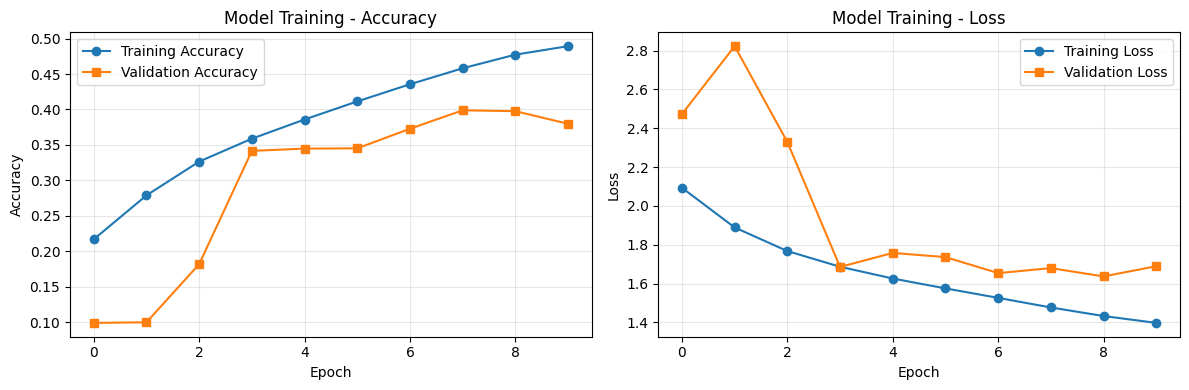

Training with optimizer = RMSProp
Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 81s 446ms/step - accuracy: 0.3704 - loss: 1.7094 - val_accuracy: 0.0958 - val_loss: 3.7367
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 77s 437ms/step - accuracy: 0.5689 - loss: 1.1834 - val_accuracy: 0.1440 - val_loss: 3.7574
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 77s 438ms/step - accuracy: 0.6368 - loss: 1.0114 - val_accuracy: 0.4214 - val_loss: 1.7731
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 83s 472ms/step - accuracy: 0.6763 - loss: 0.9025 - val_accuracy: 0.5362 - val_loss: 1.3482
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 83s 469ms/step - accuracy: 0.7074 - loss: 0.8286 - val_accuracy: 0.6972 - val_loss: 0.8763
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 82s 463ms/step - accuracy: 0.7276 - loss: 0.7656 - val_accuracy: 0.6634 - val_loss: 0.9734
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 77s 437ms/step - accuracy: 0.7408 - loss: 0.7179 - val_accuracy: 0.7358 - val_loss: 0.7660
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 75s 428ms

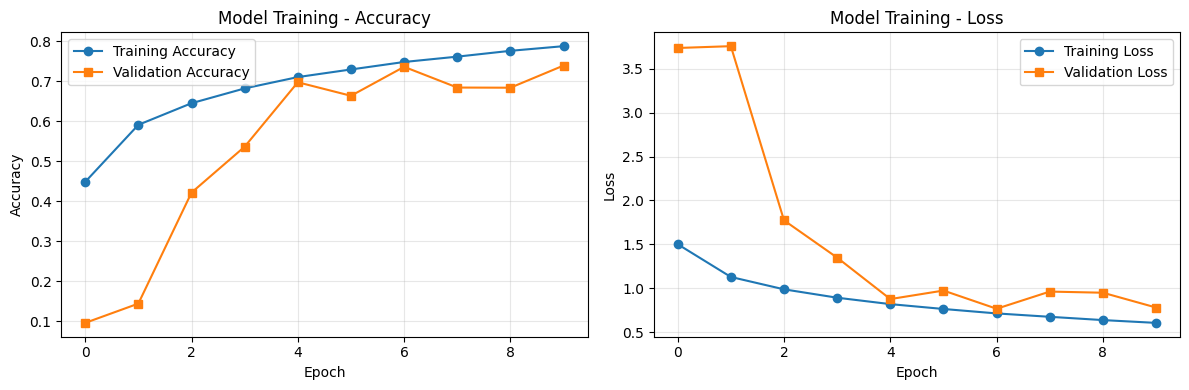

Training with optimizer = Adam
Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 83s 432ms/step - accuracy: 0.3448 - loss: 1.7236 - val_accuracy: 0.1084 - val_loss: 3.8078
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 98s 558ms/step - accuracy: 0.5847 - loss: 1.1588 - val_accuracy: 0.1656 - val_loss: 3.3148
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 85s 485ms/step - accuracy: 0.6481 - loss: 0.9846 - val_accuracy: 0.4348 - val_loss: 1.9109
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 81s 461ms/step - accuracy: 0.6874 - loss: 0.8749 - val_accuracy: 0.5802 - val_loss: 1.2406
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 84s 476ms/step - accuracy: 0.7141 - loss: 0.8025 - val_accuracy: 0.6914 - val_loss: 0.8991
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 83s 469ms/step - accuracy: 0.7336 - loss: 0.7507 - val_accuracy: 0.6972 - val_loss: 0.8944
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 77s 435ms/step - accuracy: 0.7595 - loss: 0.6896 - val_accuracy: 0.6428 - val_loss: 1.0740
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 78s 441ms/st

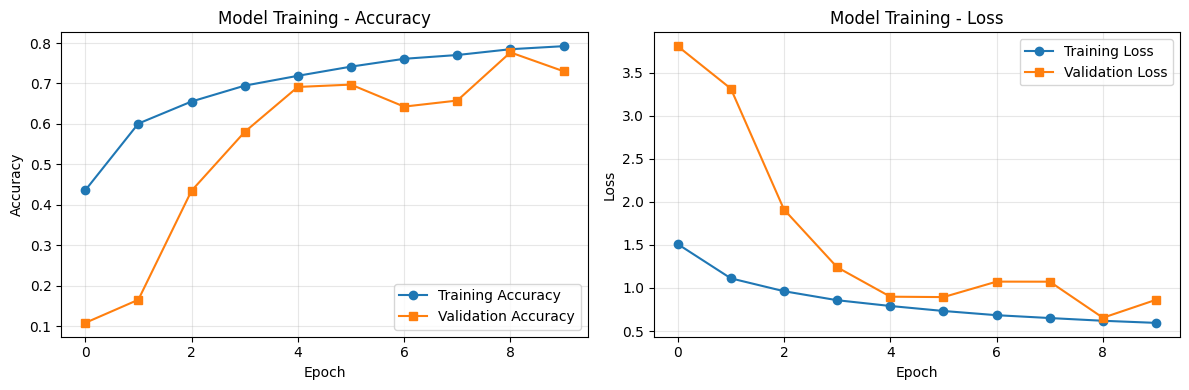

In [33]:
# Optimizer Comparison

optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'RMSProp': tf.keras.optimizers.RMSprop(),
    'Adam': tf.keras.optimizers.Adam()
}
for name, opt in optimizers.items():
    print(f"Training with optimizer = {name}")
    model = create_cnn_model((32, 32, 3), 10)
    model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)
    visualize_training_results(history)
